### Genetic algorithm using Pymoo

#### Problem

In [39]:
from pymoo.core.problem import ElementwiseProblem, Problem

### Vectorized problem
class DeterministicProblem_P(Problem):
    def __init__(self):
        super().__init__(n_var=1, #Number of variables
                         n_obj=1, #Number of objective functions
                         n_ieq_constr=0, #Number of inequalities constraints
                         n_eq_constr=0, #Number of equalities constraints
                         xl=-5, #Lower threshold 
                         xu=5) #Upper threshold
        
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = (x-3)**2

problem_p = DeterministicProblem_P()


### ElementwiseProblem
class DeterministicProblem_EWP(ElementwiseProblem):
    def __init__(self, elementwise=True, **kwargs):
        super().__init__(n_var = 1, #Number of variables
                         n_obj = 1, #Number of objective functions
                         n_ieq_constr=0, #Number of inequalities constraints
                         n_eq_constr=0, #Number of equalities constraints
                         xl = -5, #Lower threshold 
                         xu = 5) #Upper threshold
    
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = (x-3)**2
        
problem_ewp = DeterministicProblem_EWP()

#### Algorithms

##### Single objective functions

In [40]:
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.optimize import minimize

de_algo = DE(pop_size=50)
ga_algo = GA(pop_size=50)
nm_algo = NelderMead(init_simplex_scale=0.1)

res = minimize(problem=problem_ewp,
               algorithm=ga_algo,
               seed =1,
               verbose = False)

X = res.X
F = res.F

##### Multi-objective functions

In [25]:
import numpy as np

class BNH(Problem):
    def _init_(self):
        super().__init__(n_var= 2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl = np.array([0, 0]),
                         xu = np.array([5,3]))
        
    def _evaluate(self, x, out, *args, **kwargs):

        #Objective functions
        obj1 = 4*(x[:,0]**2) + 4*(x[:,1]**2) #Objective function 1
        obj2 = (x[:,0]-5)**2 + (x[:,1]-5)**2 #Objective function 2

        #Constraints, default orientation of constraints being met is < 0
        const1 = (x[:,0]-5)**2 + x[:,1]**2 - 25
        const2 = 7.7 - (x[:,0]-8)**2 -(x[:,1]+3)**2

        #Stacking objectives to "F" and constraints to "G"
        out["F"] = np.column_stack([obj1, obj2])
        out["G"] = np.column_stack([const1, const2])

In [26]:
bnh_problem = BNH()

In [7]:
def sum(x1, x3):
    n = x1 + x3
    m = x1*x3

    return n, m

print(sum(2,5)[1])

10


In [29]:
from pymoo.util.plotting import plot
n_points = 50 

x1 = np.linspace(0,5, n_points)
x2 = np.linspace(0,3, n_points)

X = np.column_stack([x1, x2])
#plot(bnh_problem.evaluate(X, return_values_of=["F"]))

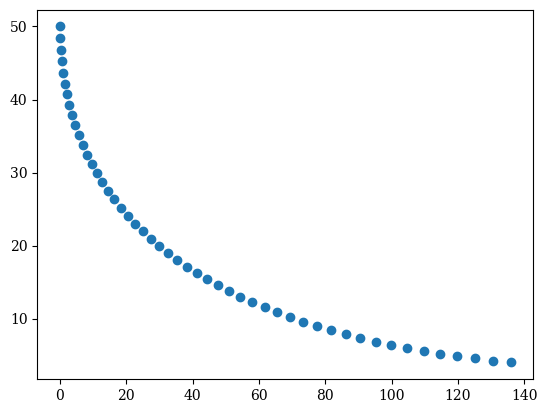

In [24]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem, Problem

class BNH(Problem):
    def __init__(self):
        super().__init__(n_var= 2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl = np.array([0, 0]),
                         xu = np.array([5,3]))
        
    def _evaluate(self, x, out, *args, **kwargs):

        #Objective functions
        obj1 = 4*(x[:,0]**2) + 4*(x[:,1]**2) #Objective function 1
        obj2 = (x[:,0]-5)**2 + (x[:,1]-5)**2 #Objective function 2

        #Constraints, default orientation of constraints being met is < 0
        const1 = (x[:,0]-5)**2 + x[:,1]**2 - 25
        const2 = 7.7 - (x[:,0]-8)**2 -(x[:,1]+3)**2

        #Stacking objectives to "F" and constraints to "G"
        out["F"] = np.column_stack([obj1, obj2])
        out["G"] = np.column_stack([const1, const2])
        

bnh_problem = BNH()

# Let's visualise the problem
from pymoo.util.plotting import plot

n_points = 50

x1 = np.linspace(0, 5, n_points)
x2 = np.linspace(0, 3, n_points)

X = np.column_stack([x1, x2])
plot(bnh_problem.evaluate(X, return_values_of=["F"]))


In [25]:
from pymoo.algorithms.moo.nsga2 import NSGA2
algorithm = NSGA2(pop_size = 1000)

res = minimize(problem = bnh_problem,
               algorithm = algorithm,
               seed=1,
               verbose=True)



n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |     1000 |    170 |  0.000000E+00 |  0.1643704963 |             - |             -
     2 |     2000 |    246 |  0.000000E+00 |  0.000000E+00 |  0.0033525942 |         ideal
     3 |     3000 |    355 |  0.000000E+00 |  0.000000E+00 |  0.0041060214 |         ideal
     4 |     4000 |    467 |  0.000000E+00 |  0.000000E+00 |  0.0010565735 |             f
     5 |     5000 |    627 |  0.000000E+00 |  0.000000E+00 |  0.0016527797 |             f
     6 |     6000 |    820 |  0.000000E+00 |  0.000000E+00 |  0.0141313888 |         nadir
     7 |     7000 |   1000 |  0.000000E+00 |  0.000000E+00 |  0.0074281685 |         nadir
     8 |     8000 |   1000 |  0.000000E+00 |  0.000000E+00 |  0.0092772392 |         nadir
     9 |     9000 |   1000 |  0.000000E+00 |  0.000000E+00 |  0.0060992118 |         nadir
    10 |    10000 |   1000 |  0.000000E+00 |  0.000000E+00 |  0.0001299511 |             f

array([[2.36850208e-06, 6.91741952e-06],
       [5.00000000e+00, 3.00000000e+00],
       [3.46138173e+00, 2.99999925e+00],
       ...,
       [4.33904506e-01, 5.03079164e-01],
       [9.53479618e-01, 9.69003763e-01],
       [1.01824180e+00, 1.02033116e+00]])

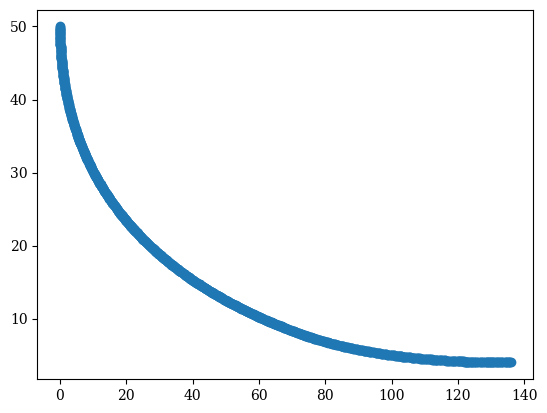

In [29]:
X = res.X
F = res.F

plot(res.F, )

In [38]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.problems import get_problem
from pymoo.optimize import minimize


problem = get_problem("sphere")
algorithm = GA(pop_size=5)
res = minimize(problem,
               algorithm,
               ('n_gen', 30),
               seed=1)


X = res.X
F = res.F

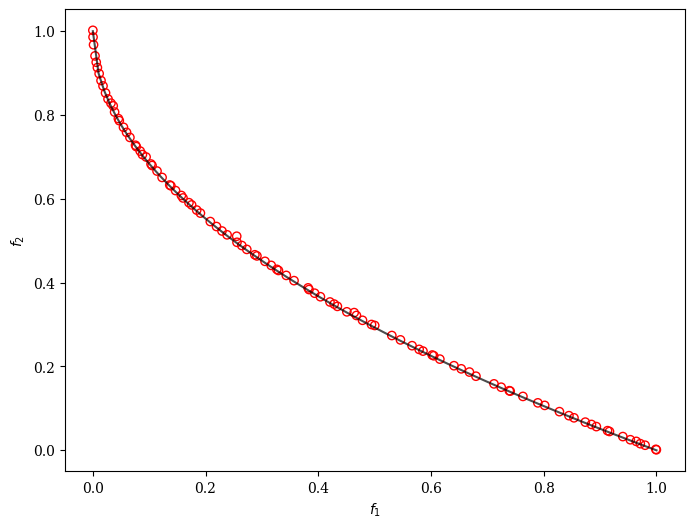

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [6]:
from pymoo.core.problem import Problem
import math
import xml.etree.ElementTree as ET
import subprocess
import pandas as pd
import sys
import numpy as np
import os
import random
from multiprocessing import Pool

viability = np.loadtxt('../data_output/viability.csv', delimiter=",", skiprows=1)
concentration = np.loadtxt('../data_output/concentration.csv', delimiter=",", skiprows=1)
experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
viability_exp = experimental[:,1]
concentration_exp = experimental[:,2]
N = 13



obj1 = np.sqrt(np.sum((viability - viability_exp)**2) / N) #RMSE of viability
obj2 = np.sqrt(np.sum((concentration - concentration_exp)**2) / N) #RMSE of concentration

class calibrationProb(Problem):
    def __init__(self):
        super().__init__(n_var = 10,
                       n_obj = 2,
                       xl = np.array([0.9, 0.9, 4e-5, 0.9, 24e-2, 0.9, 91e-2, 0.9, 0.9, 3e-2]),
                       xu = np.array([1.2, 1.2, 6e-5, 1.2, 26e-2, 1.2, 93e-2, 1.2, 1.2, 5e-2]))
        
    def _evaluate(self, x, out):
        #Objective functions
        obj1 = np.sqrt(np.sum((viability - viability_exp)**2) / N) #RMSE of viability
        obj2 = np.sqrt(np.sum((concentration - concentration_exp)**2) / N) #RMSE of concentration

        #Stacking objectives to "F" 
        out["F"] = np.column_stack([obj1, obj2])

NLC_problem = calibrationProb()